数据格式
```json
[
  {"text": "This is a sentence.", "label": 1},
  {"text": "Another example.", "label": 0}
]
```

In [1]:
from datasets import load_dataset
import pandas as pd
from tqdm import tqdm
import os
import glob
import numpy as np
import json
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import beta



/usr/local/lib/python3.10/dist-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [4]:
import os
import requests

os.environ['http_proxy'] = 'http://192.168.22.3:7890'
os.environ['https_proxy'] = 'http://192.168.22.3:7890'

response = requests.get('http://huggingface.co')
response

<Response [200]>

In [13]:
np.random.seed(3407)  # 为了保持结果一致，设置随机种子

### 分布测试

#### 高斯分布

In [42]:
mu = 0.9  # 期望
sigma = 0.05  # 标准差

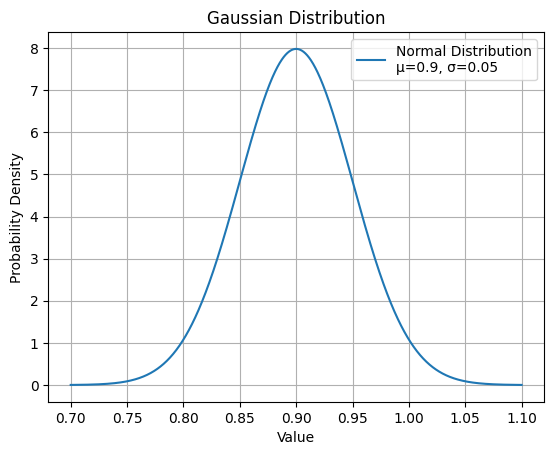

In [43]:
# 生成数据的范围
x = np.linspace(mu - 4*sigma, mu + 4*sigma, 1000)

# 计算正态分布的概率密度函数（PDF）
pdf = norm.pdf(x, mu, sigma)

# 绘制高斯分布曲线
plt.plot(x, pdf, label=f'Normal Distribution\nμ={mu}, σ={sigma}')
plt.title('Gaussian Distribution')
plt.xlabel('Value')
plt.ylabel('Probability Density')
plt.grid(True)
plt.legend()
plt.show()

#### Beta分布

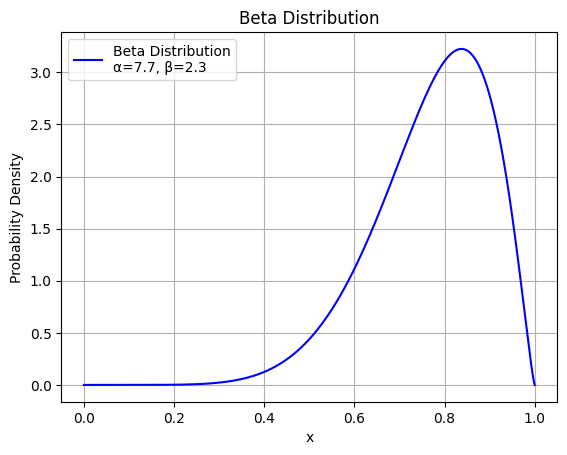

In [56]:
# 设置 Beta 分布的参数
alpha = 7.7 # α 参数（shape 参数 1）
beta_param = 2.3# β 参数（shape 参数 2）

# 定义 x 的范围（Beta 分布的定义域为 [0, 1]）
x = np.linspace(0, 1, 1000)

# 计算 Beta 分布的概率密度函数 (PDF)
pdf = beta.pdf(x, alpha, beta_param)

# 绘制 Beta 分布
plt.plot(x, pdf, label=f'Beta Distribution\nα={alpha}, β={beta_param}', color='blue')
plt.title('Beta Distribution')
plt.xlabel('x')
plt.ylabel('Probability Density')
plt.grid(True)
plt.legend()
plt.show()

### 法律1

In [6]:
law_contents = []
result = []
directory = '/root/for_may_conference/tele-chat_old/data/all_data/法律法规'
txt_files = []
for subdirs, dirs, files in os.walk(directory):
    txt_files = glob.glob(os.path.join(subdirs, '*.txt'))
    for txt_file in txt_files:
        with open(os.path.join(directory, txt_file), 'r') as f:
            content = f.read()
            # 删除前三行
            content = '\n'.join(content.split('\n')[2:])
            if content == '':
                continue
            content = content.replace('\n','').replace(' ','').replace('\t','').replace('\u3000\u3000','').replace('\xa0','').replace('文件内容：','')
            law_contents.append(content)

In [7]:
len(law_contents)

21493

In [ ]:
law_contents

In [9]:
type(law_contents)

list

In [10]:
df = pd.DataFrame(law_contents, columns=['text']) 

In [ ]:
df

In [60]:
alpha = 8 # α 参数（shape 参数 1）
beta_param = 2# β 参数（shape 参数 2）

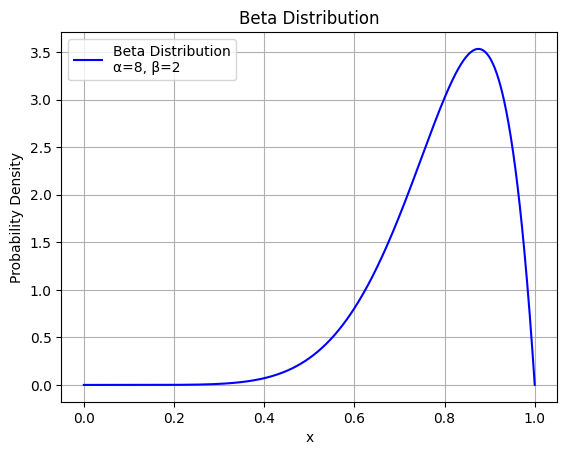

In [61]:
# 定义 x 的范围（Beta 分布的定义域为 [0, 1]）
x = np.linspace(0, 1, 1000)

# 计算 Beta 分布的概率密度函数 (PDF)
pdf = beta.pdf(x, alpha, beta_param)

# 绘制 Beta 分布
plt.plot(x, pdf, label=f'Beta Distribution\nα={alpha}, β={beta_param}', color='blue')
plt.title('Beta Distribution')
plt.xlabel('x')
plt.ylabel('Probability Density')
plt.grid(True)
plt.legend()
plt.show()

In [62]:
df['label'] = beta.rvs(alpha, beta_param, size=len(df))

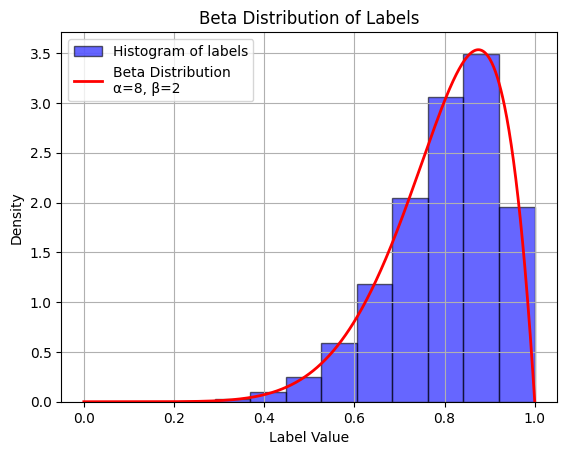

                                                    text     label
0      安徽省实施《中华人民共和国土地管理法》办法​（1987年12月20日安徽省第六届人民代表大会...  0.792966
1      延边朝鲜族自治州促进鹿业发展条例（2010年1月9日延边朝鲜族自治州第十三届人民代表大会第三...  0.499620
2      浙江省科学技术进步条例​（1997年11月12日浙江省第八届人民代表大会常务委员会第四十次会...  0.898102
3      执法条例》《深圳经济特区规划土地监察条例》有关规定的决定（2021年6月29日深圳市第七届人...  0.765567
4      济宁市养犬管理条例（2018年12月27日济宁市第十七届人民代表大会常务委员会第十九次会议通...  0.882027
...                                                  ...       ...
21488  最高人民检察院关于印发《最高人民检察院关于适用刑法分则规定的犯罪的罪名的意见》的通知各省、自...  0.454023
21489  最高人民法院关于人民法院应否受理财政、扶贫办等非金融行政机构借款合同纠纷的批复1993年8月...  0.911435
21490  中华人民共和国最高人民法院公告最高人民法院《关于审理融资租赁合同纠纷案件适用法律问题的解释》...  0.825430
21491  中华人民共和国最高人民法院公告《最高人民法院关于破产清算组在履行职责过程中违约或侵权等民事纠...  0.803335
21492  最高人民法院人民法院对外委托司法鉴定管理规定法释〔2002〕8号（2002年2月22日最高人...  0.846940

[21493 rows x 2 columns]


In [63]:
# 可视化：绘制 Beta 分布的样本值
plt.hist(df['label'], bins=10, density=True, alpha=0.6, color='blue', edgecolor='black', label='Histogram of labels') 

# 定义 x 的范围
x = np.linspace(0, 1, 1000)

# 计算 Beta 分布的概率密度函数（仅用于参考分布曲线）
pdf = beta.pdf(x, alpha, beta_param)

# 添加理论 Beta 分布的参考曲线
plt.plot(x, pdf, 'r-', lw=2, label=f'Beta Distribution\nα={alpha}, β={beta_param}')
plt.title('Beta Distribution of Labels')
plt.xlabel('Label Value')
plt.ylabel('Density')
plt.legend()
plt.grid(True)
plt.show()

# 打印替换后的 DataFrame
print(df)

In [ ]:
data_dict = df.to_dict(orient="records")
data_dict

In [66]:
# 保存为 JSON 文件，带缩进
with open("data.json", "w", encoding="utf-8") as f:
    json.dump(data_dict, f, indent=4, ensure_ascii=False)

In [ ]:
print(json.dumps(data_dict, indent=4, ensure_ascii=False))

In [2]:
# 方差
# # 定义方差函数
def beta_variance(alpha, total=20):
    beta = total - alpha
    return (alpha * beta) / ((total) ** 2 * (total + 1))

In [ ]:

# 计算方差
alpha_values = np.arange(1, 20, 0.1)  # 取值范围从1到19
variances = [beta_variance(alpha) for alpha in alpha_values]

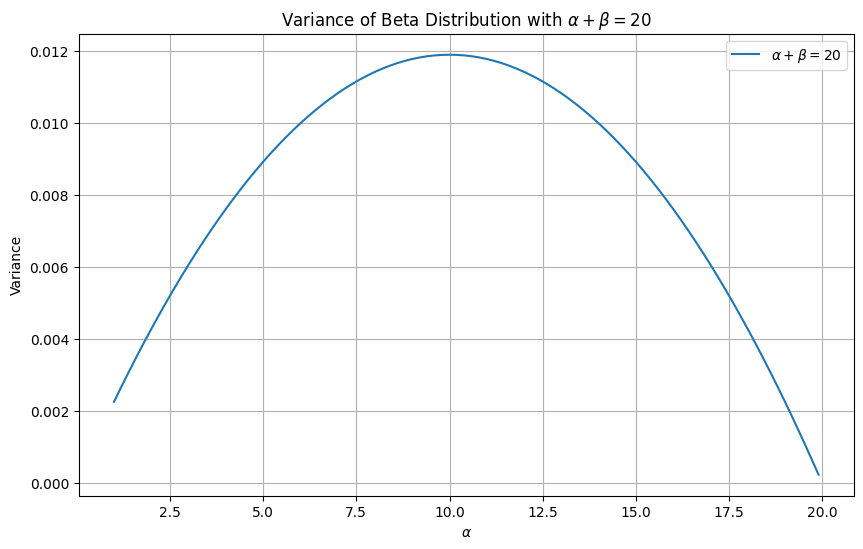

In [5]:
# 绘制曲线
plt.figure(figsize=(10, 6))
plt.plot(alpha_values, variances, label=r'$\alpha + \beta = 20$')
plt.xlabel(r'$\alpha$')
plt.ylabel('Variance')
plt.title(r'Variance of Beta Distribution with $\alpha + \beta = 20$')
plt.grid(True)
plt.legend()
plt.show()